<a href="https://colab.research.google.com/github/PedemonteGiacomo/DataScienceProject/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt #libreria grafica da usare dopo il calcolo dell'istogramma, grazie anche a numpy(np) 
import numpy as np
#!pip install scipy==1.7.0
import scipy.stats as stats
import scipy
print (scipy.__version__)

1.4.1


Importazione del database contenente la playlist spotify: top50 del 2019





In [2]:
top50 = pd.read_csv('top50.csv')
top50.head()

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
top50.shape

(50, 14)

In [4]:
top50.describe()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Andiamo a vedere ora quante canzoni ci sono per genere in questa top50 andando a visualizzare il tutto con un istogramma:

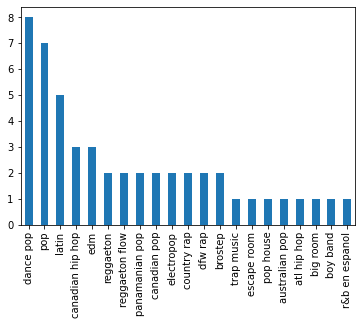

In [5]:
num_genre = top50['Genre'].value_counts()
#print(num_genre)
num_genre.plot(kind = 'bar')

Vediamo subito in questo modo che il genere più presente nella top50 del 2019 era il dance pop.
Ci possiamo anche però porre se fosse il più popolare e quindi dobbiamo vedere un istrogramma della popolarità delle canzoni raggruppandole per genere:

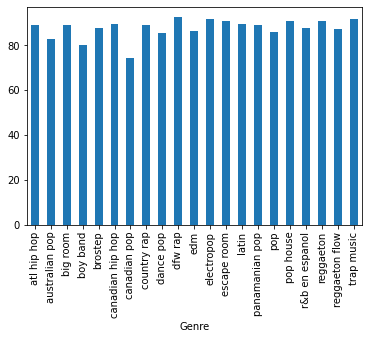

In [6]:
top50.groupby('Genre')['Popularity'].mean().plot(kind='bar')

Da questo grafico si evince che il dance pop, il genere che presenta più canzoni nella top50, non è ha la media di popularità più alta.

Ora andiamo a vedere la relazione tra genere e posizione ottenuta in classifica:

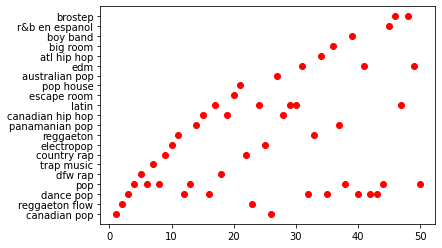

In [7]:
plt.scatter(top50['Position'],top50['Genre'],color='r')

<BarContainer object of 50 artists>

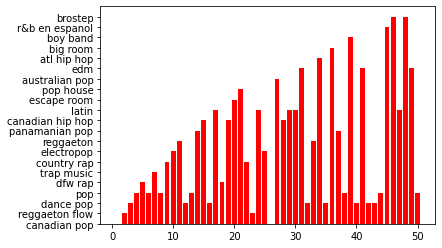

In [8]:
plt.bar(top50['Position'],top50['Genre'],color='r')

Vediamo quindi quale genere ha la media più alta di posizionamento in questa top50:

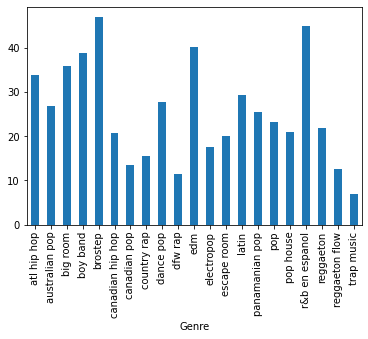

In [9]:
top50.groupby('Genre')['Position'].mean().plot(kind='bar')

In questo caso si vede come il genere "messo meglio" in classifica con una media del posizionamento è il genere: trap music

Sotto riportiamo il box plot per apprezzare la varianza della mediana del posizionamento di ogni genere, da questo grafico inoltre si evince quali generi presentino la maggior quantità di canzoni e quanto siano distaccati i posizionamenti in classifica di queste.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


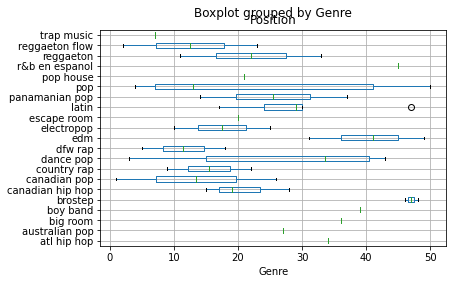

In [10]:
top50.boxplot(column= 'Position', by='Genre',vert=False)

Ora andiamo a vedere le analogie tra genere e Beats Per Minuto:

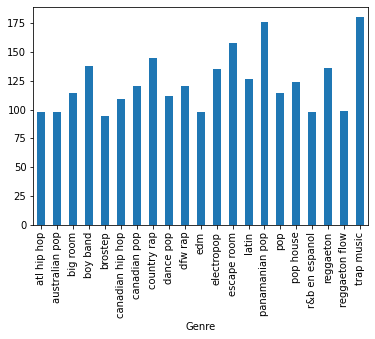

In [11]:
top50.groupby('Genre')['Beats.Per.Minute'].mean().plot(kind='bar')

Si evince dal grafico soprastante che il genere con più battiti è la trap music.

Andremo poi a studiare se e come infuisce il numero di battiti per minuto con la popolarità della canzone dato che il genere con il più alto numero di bpm è anche il genere piazzato meglio mediamente nella top50 analizzata.

Vediamo innanzitutto l'indice di correlazione di Perason del dataset che stiamo analizzando:

In [12]:
top50.corr()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Position,1.000000,-0.259193,0.102649,0.122691,0.011914,0.270659,0.137329,-0.065844,-0.015993,-0.257506,-0.160680
Beats.Per.Minute,-0.259193,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.102649,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,0.122691,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.011914,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,0.270659,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,0.137329,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.065844,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.015993,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,-0.257506,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553


Da questo possiamo trarre parecchie deduzioni da analizzare:


*   La posizione in classifica sembra non essere "affetta" da nessun altra caratteristica/attributo. Solo la liveness arriva ad influire ma veramente poco.
*   Un dato curioso è tra i Beats per Minute e la Specchness : 0.557052, il quale è un valore abbastanza alto di correlazione tra i due attributi/carattersitiche.
*   L'energia di una canzone è correlata abbastanza fortemente con la sua Loudness e un po' di meno con i bpm(in questa playlist).
*   I mood positivo della canzone è parzialmente influenzato dal numero di bpm della canzone.

In sostanza comunque i dati non sembrano essere molto correlati tra di loro, o per lo meno non sembrano esserci dati "legati" tra loro in modo rigoroso.



Vediamo ora come eseguire il t-test tra due generi per confrontare:


1.   quale dei due ha più o meno bpm medio
2.   quale dei due ha più o meno popolarità media
3.   quale dei due ha più o meno il posizionamento medio alto
4.   etc...
